In [77]:
%load_ext autoreload

In [78]:
%autoreload 2

In [1]:
import numpy as np
from time import sleep, time

In [2]:
import os

In [3]:
import tables

In [4]:
import pandas as pd

In [5]:
from scipy.interpolate import interp1d

In [6]:
from scipy.special import erf
# from scipy.integrate import quad
from numpy import pi, sqrt, exp

In [7]:
from astropy.cosmology import FlatLambdaCDM, Planck18

In [8]:
import vrpy_tools
# import velociraptor-python-tools

In [9]:
from gadget_tools import Snapshot, read_positions_all_files, read_partIDs_all_files, read_all_hdf5

In [10]:
from pm_tools import assign_density, assign_density_sph, project_to_slice, Region, Transform

In [11]:
# import yt
# import numpy as np
# import yt.units as units
# import pylab
# import sphviewer
# from sphviewer.tools import QuickView

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [13]:
# import yt
# import yt.units as units

In [14]:
# 

In [15]:
L=200
N = 256
i=12
rund='r21'

In [16]:
ospath_prefix = f"/scratch/cprem/"
# ospath_prefix = r"S:/"


In [17]:
snapfile_dmo = ospath_prefix + f"sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}"
snapfile = ospath_prefix + f"sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}"

In [18]:
siminfo = vrpy_tools.ReadSimInfo( ospath_prefix + f"sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [19]:
config = vrpy_tools.ReadConfigInfo( ospath_prefix + f"sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [20]:
a = siminfo['ScaleFactor']
z = 1/a - 1
h = siminfo['h_val']
Om_m = siminfo['Omega_m']

In [21]:
p18py = Planck18

In [22]:
a**3

0.14605345616962515

In [23]:
hal_vr_dict, N_hal_tot_vr = vrpy_tools.ReadPropertyFile(ospath_prefix + f"sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}", ibinary=2, isiminfo=False, iunitinfo=False, iconfiginfo=False)
hal_vr_all = pd.DataFrame.from_dict(hal_vr_dict)
hal_vr_all.set_index('ID', inplace=True)

In [24]:
massive_hali = hal_vr_all.Mass_BN98.argmax()

In [25]:
hal_vr_all.Mass_BN98.max()

396341383831973.2

In [26]:
np.log10(hal_vr_all.iloc[massive_hali].Mass_BN98)

14.59806942139178

In [27]:
X = hal_vr_all.iloc[massive_hali].Xc

In [28]:
Y = hal_vr_all.iloc[massive_hali].Yc

In [29]:
Z = hal_vr_all.iloc[massive_hali ].Zc

In [30]:
R = hal_vr_all.iloc[massive_hali].Rvir
R

1.986632200696414

In [31]:
# ds = yt.load(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5")

In [32]:
# ds.fields

In [33]:
fac = L/N

In [34]:
fac 

0.78125

In [35]:
hal_vr_all.iloc[massive_hali].Xc/fac

122.08123233050149

In [36]:
hal_vr_all.iloc[massive_hali].Yc/fac

200.56608815332743

In [37]:
hal_vr_all.iloc[massive_hali].Zc/fac

222.0740513066536

In [38]:
hal_vr_all.iloc[massive_hali].Rvir/fac

2.54288921689141

In [39]:
z_slc = int(hal_vr_all.iloc[massive_hali].Zc//fac)

In [40]:
z_slc 

222

In [41]:
# np.logical_and.reduce((posd[:,0]>X-loc_box*R), (posd[:,0]<X+loc_box*R), (posd[:,1]>Y-loc_box*R), (posd[:,1]<Y+loc_box*R), (posd[:,2]>Z-loc_box*R), (posd[:,2]<Z+loc_box*R))

In [42]:
loc_box = 2

In [43]:
proj_axis = 2

In [44]:
hal_cen = np.array([X,Y,Z])
hal_cen

array([ 95.37596276, 156.69225637, 173.49535258])

In [45]:
snap_dmo = Snapshot(snapfile_dmo+".0")
snap = Snapshot(snapfile+".0")

In [46]:
region_dmo = Region('cube', cen=hal_cen,side=2*loc_box*R,box_size=snap_dmo.box_size)
region = Region('cube', cen=hal_cen,side=2*loc_box*R,box_size=snap.box_size)

In [47]:
# select_index = region.selectPrtcl(posd_dmo, engine='c++')
# posd_dmo_sele = region.shift_origin(posd_dmo[select_index])

In [48]:
# posd_dmo_sele+loc_box*R

In [49]:
# posd_dmo_sel

In [50]:
# select_index[0].shape

In [51]:
# seld_ind_dmo[0].shape

In [52]:
posd_dmo = read_all_hdf5('Coordinates', 1, snapfile_dmo)

/scratch/cprem/sims/L200_N256_Cp18/r21/snaps/snapdir_012/snapshot_012.0.hdf5 <HDF5 file "snapshot_012.0.hdf5" (mode r)> ['Config', 'Header', 'Parameters', 'PartType1']


In [53]:
!echo $PYTHONPATH

:/mnt/home/student/cprem/my-library/pytn/:/mnt/home/student/cprem/my-library/pytn/


In [54]:
# seld_ind_dmo = np.where((posd_dmo[:,0]>X-loc_box*R) & (posd_dmo[:,0]<X+loc_box*R) & (posd_dmo[:,1]>Y-loc_box*R) & (posd_dmo[:,1]<Y+loc_box*R) & (posd_dmo[:,2]>Z-loc_box*R) & (posd_dmo[:,2]<Z+loc_box*R))
# posd_dmo_sel = posd_dmo[seld_ind_dmo].copy()
# posd_dmo_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posd_dmo_sel.max()

In [55]:
# pIDd_dmo = read_partIDs_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo', downsample=1)

In [56]:
seld_ind_dmo = region_dmo.selectPrtcl(posd_dmo, engine='c++')
posd_dmo_sel = region_dmo.shift_origin(posd_dmo[seld_ind_dmo])
posd_dmo_sel_noneg = posd_dmo_sel + loc_box*R
posd_dmo_sel.max()


    selection bool array obtained
0.03983616828918457

    selection index array obtained
0.003666400909423828


3.9721665142566422

In [73]:
posd_dmo_sel.shape

(16254, 3)

In [74]:
posd_dmo.shape

(16777216, 3)

In [64]:
# pIDd_dmo[seld_ind_dmo]

In [65]:
rhod_dmo = assign_density(posd_dmo_sel_noneg, 2*loc_box*R, scheme='TSC', overdensity=False, grid_size=512)
# rhod_dmo_slice = rhod_dmo.mean(axis=proj_axis)
rhod_dmo_slice = project_to_slice(rhod_dmo, snap_dmo.box_size, proj_axis, 'centre', 2*loc_box*R)


    slice index obtained
6.651878356933594e-05


In [66]:
# vars(snap_dmo)

In [67]:
# posd = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo', downsample=1)

In [68]:
# posb = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Gas', downsample=1)

In [69]:
posd = read_all_hdf5('Coordinates', 1, snapfile)

In [70]:
# posd == posd_dmo

In [71]:
# snapfile_dmo

In [72]:
# import h5py

In [73]:
# h5file1.keys()

In [74]:
# h5file1 = h5py.File(snapfile+'.0.hdf5', 'r')

In [75]:
# h5file = tables.open_file(snapfile+'.2.hdf5')

In [76]:
# h5file.root.Parameters

In [77]:
# h5file

In [78]:
# posb = read_all_hdf5('Coordinates', 0, snapfile)

In [79]:
# massb = read_all_hdf5('Masses', 0, snapfile)
# hsmlb = read_all_hdf5('SmoothingLength', 0, snapfile)

In [80]:
# del massb, hsmlb

In [81]:
massb = 1; hsmlb=1

In [82]:
# snap.filename

In [83]:
# hsmlb[selb_ind]

In [84]:
posb.shape

NameError: name 'posb' is not defined

In [ ]:
# i=0
# while i<snap.num_files:
#     snaph5 = tables.open_file(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.{i:d}.hdf5", 'r')

In [ ]:
# snaph5.root.PartType0.SmoothingLength #[selb_ind]

In [ ]:
# seld_ind

In [ ]:
posd_dmo_sel.shape

In [85]:
# seld_ind = np.where((posd[:,0]>X-loc_box*R) & (posd[:,0]<X+loc_box*R) & (posd[:,1]>Y-loc_box*R) & (posd[:,1]<Y+loc_box*R) & (posd[:,2]>Z-loc_box*R) & (posd[:,2]<Z+loc_box*R))
# posd_sel = posd[seld_ind].copy()
# posd_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posd_sel.max()

In [86]:
seld_ind = region.selectPrtcl(posd, engine='c++')
posd_sel = region.shift_origin(posd[seld_ind])
posd_sel_noneg = posd_sel + loc_box*R
posd_sel_noneg.max()


    selection bool array obtained
0.06893348693847656

    selection index array obtained
0.005049467086791992


3.9729588712030566

In [87]:
rhod = assign_density(posd_sel_noneg, 2*loc_box*R, scheme='TSC', overdensity=False, grid_size=512)
# rhod_slice = rhod.mean(axis=proj_axis)
rhod_slice = project_to_slice(rhod, snap.box_size, proj_axis, 'centre', 2*loc_box*R)


    slice index obtained
3.361701965332031e-05


In [88]:
# selb_ind = np.where((posb[:,0]>X-loc_box*R) & (posb[:,0]<X+loc_box*R) & (posb[:,1]>Y-loc_box*R) & (posb[:,1]<Y+loc_box*R) & (posb[:,2]>Z-loc_box*R) & (posb[:,2]<Z+loc_box*R))
# posb_sel = posb[selb_ind].copy()
# posb_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posb_sel.max()

In [89]:
selb_ind = region.selectPrtcl(posb, engine='c++')
posb_sel = region.shift_origin(posb[selb_ind])
posb_sel_noneg = posb_sel + loc_box*R
posb_sel_noneg.max()

NameError: name 'posb' is not defined

In [123]:
rhob = assign_density_sph(posb_sel_noneg, massb[selb_ind], hsmlb[selb_ind], 2*loc_box*R, grid_size=64, scheme='cubic', return_grid='density')
rhob_slice = rhob.mean(axis=proj_axis)

TypeError: 'int' object is not subscriptable

In [79]:
rhob_slice.shape

(64, 64)

In [80]:
# project_to_slice(rhob, snap.box_size, proj_axis, 'centre', 2*loc_box*R) == rhob_slice)

In [81]:
# rhod_slice

In [90]:
def find_peak_idx(arr):
    return np.unravel_index(arr.argmax(), arr.shape)
def find_peak(arr, extent_cube):
    indx = find_peak_idx(arr)
    return (np.array(indx)/arr.shape[0]) * (extent_cube[1]-extent_cube[0]) + extent_cube[0]

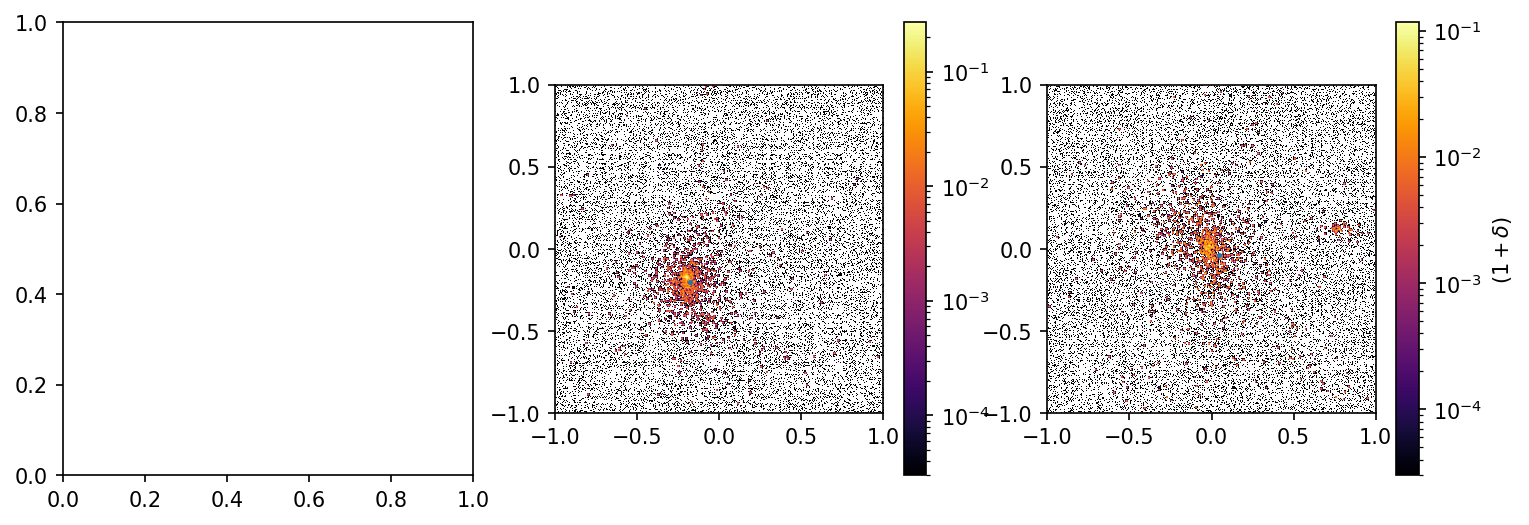

In [92]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(12,4), dpi=150)
# im1 = ax1.imshow(rhob_slice, norm=LogNorm(vmin=3e-6), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
# ax1.scatter(*find_peak(rhob_slice,[-loc_box,loc_box]), s=2)
# cb1 = fig.colorbar(im1,ax=ax1)
# cb1.set_label(r"$(1+\delta)$")
im2 = ax2.imshow(rhod_slice, norm=LogNorm(vmin=3e-5), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
ax2.scatter(*find_peak(rhod_slice,[-loc_box,loc_box]), s=2)
cb2 = fig.colorbar(im2,ax=ax2)
# cb2.set_label(r"$(1+\delta)$")
im3 = ax3.imshow(rhod_dmo_slice, norm=LogNorm(vmin=3e-5), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
ax3.scatter(*find_peak(rhod_dmo_slice,[-loc_box,loc_box]), s=2)
cb3 = fig.colorbar(im3,ax=ax3)
cb3.set_label(r"$(1+\delta)$")

<ipython-input-93-2cfd9ed5ea46>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  cmap.set_bad(color='black')


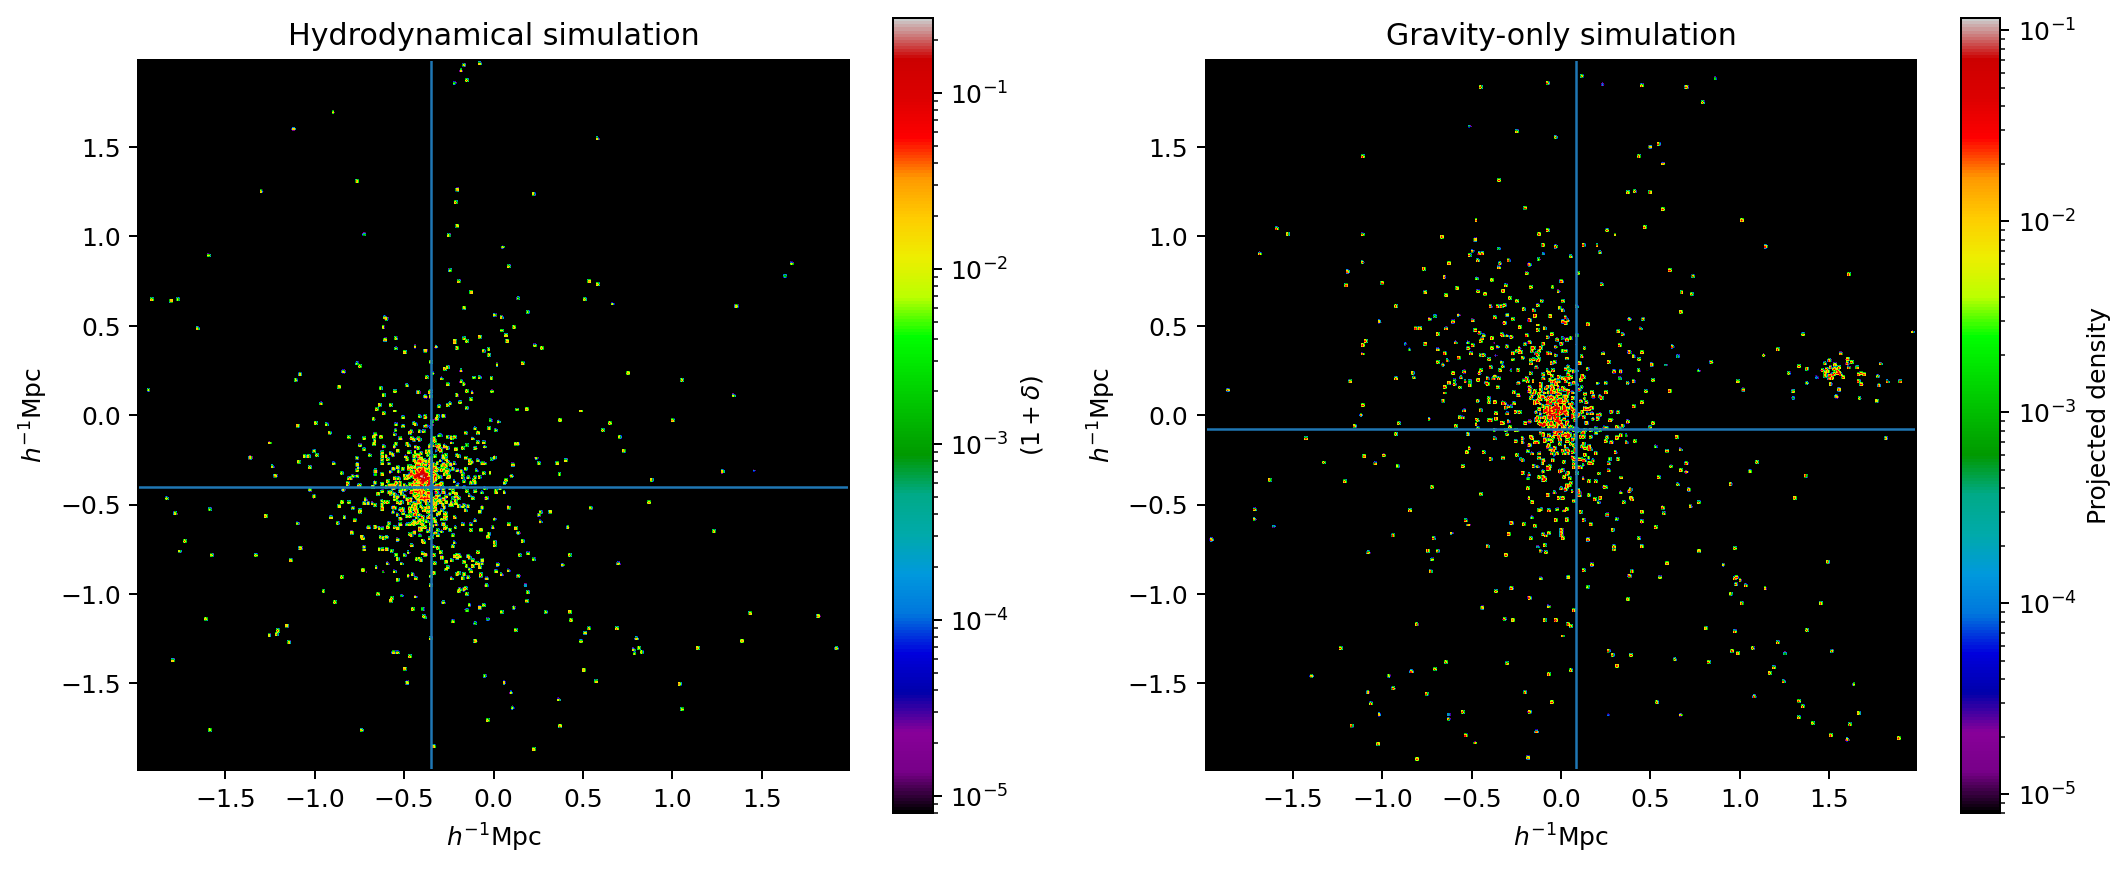

In [93]:
cmap = plt.cm.nipy_spectral
cmap.set_bad(color='black')
fig, (ax2,ax3) = plt.subplots(1,2, figsize=(12,5), dpi=180)
# im1 = ax1.imshow(rhob_slice, norm=LogNorm(vmin=3e-6), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
# ax1.scatter(*find_peak(rhob_slice,[-loc_box,loc_box]), s=2)
# cb1 = fig.colorbar(im1,ax=ax1)
# cb1.set_label(r"$(1+\delta)$")
im2 = ax2.imshow(rhod_slice, norm=LogNorm(vmin=8e-6), cmap=cmap, extent=[-loc_box*R,loc_box*R,-loc_box*R,loc_box*R], origin='lower')
peakpos2 = find_peak(rhod_slice,[-loc_box*R,loc_box*R])
ax2.scatter(*peakpos2, s=2)
ax2.axhline(peakpos2[1], lw=1)
ax2.axvline(peakpos2[0], lw=1)
cb2 = fig.colorbar(im2,ax=ax2)
# cb2.set_label(r"$(1+\delta)$")
im3 = ax3.imshow(rhod_dmo_slice, norm=LogNorm(vmin=8e-6), cmap=cmap, extent=[-loc_box*R,loc_box*R,-loc_box*R,loc_box*R], origin='lower')
peakpos3 = find_peak(rhod_dmo_slice,[-loc_box*R,loc_box*R])
ax3.axhline(peakpos3[1], lw=1)
ax3.axvline(peakpos3[0], lw=1)
ax3.scatter(*peakpos3, s=2)
cb3 = fig.colorbar(im3,ax=ax3)
cb2.set_label(r"$(1+\delta)$")
cb3.set_label(r"Projected density")
ax2.set_xlabel(r'$h^{-1}$Mpc')
ax2.set_ylabel(r'$h^{-1}$Mpc')
ax3.set_xlabel(r'$h^{-1}$Mpc')
ax3.set_ylabel(r'$h^{-1}$Mpc')
ax3.set_title('Gravity-only simulation')
ax2.set_title('Hydrodynamical simulation')
plt.tight_layout()
fig.savefig('mmhalo_slice.pdf')

In [94]:
10**-1.5

0.03162277660168379

In [95]:
Rad_bin_edge_1 = np.linspace(0.005, .2e-1, 100)

In [96]:
Rad_bin_edge_2 = np.logspace(-1.4,np.log10(2*R),1000)
Rad_bin_edge_2 = np.delete(Rad_bin_edge_2,[1,3,5,7])

In [97]:

# Rad_bin_edge_2

In [98]:
Rad_bin_edge = np.concatenate([Rad_bin_edge_1, Rad_bin_edge_2])

In [99]:
Rad_bin_edge = np.insert(Rad_bin_edge,0,0)

In [100]:
Rad_bin_edge.sort()
Rad_bin_edge

array([0.        , 0.005     , 0.00515152, ..., 3.93681647, 3.95499845,
       3.9732644 ])

In [101]:
Rad_bin_cen = (Rad_bin_edge[1:] * Rad_bin_edge[:-1])**(1/2)

In [102]:
# Rad_bin_cen

In [103]:
vir_dens = config['Virial_density']*config['Critical_density']/p18py.Om(z)/ (h**2/a**3)*snap.mass_table[1]/snap_dmo.mass_table[1]

In [104]:
config['Critical_density']/ (h**2/a**3)

84993066794.41269

In [105]:
h**2/a**3

3.1482966720484162

In [106]:
vir_dens

14739052088109.37

In [107]:
find_peak(rhod_dmo_slice,[-loc_box,loc_box])

array([ 0.04296875, -0.0390625 ])

In [108]:
posd_r = np.linalg.norm(posd_sel-find_peak(rhod,[-loc_box*R,loc_box*R]), axis=1)

In [109]:
mass_profile = np.histogram(posd_r, Rad_bin_edge)[0]* snap.mass_table[1]*1e10

In [101]:
# mass_profile

In [359]:
#sph to grid and then shell
assert 0

AssertionError: 

In [ ]:
peakidx = find_peak_idx(rhob)

In [ ]:
idxs = np.indices(rhob.shape)
idxs.shape

In [ ]:
for axi in (0,1,2):
    idxs[axi] -= peakidx[axi]

In [ ]:
# idxs

In [507]:
cellb_r = np.linalg.norm(idxs, axis=0) * (2*loc_box*R / rhob.shape[0])
cellb_r.shape

(384, 384, 384)

In [508]:
cellb_r.mean()

1.974147639368976

In [509]:
df_cell = pd.DataFrame(data={'r':np.ravel(cellb_r), 'dens':np.ravel(rhob),} )

In [510]:
np.ravel(cellb_r).shape

(56623104,)

In [511]:
# df_cell.iloc[11000:11100]

In [512]:
# df

In [513]:
# df_cell_sam = df_cell.sample(frac=.001)
df_cell_sam = df_cell.sort_values('r')

In [514]:
dens_profile_bar = df_cell_sam.dens.groupby(pd.cut(df_cell_sam.r,bins=Rad_bin_edge)).mean().to_numpy()

In [515]:
dens_profile_bar*=1e10

In [516]:
Rad_bin_edge.shape

(107,)

In [517]:
dens_profile_bar.shape

(106,)

In [518]:
mass_profile_bar = dens_profile_bar * (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3))

In [102]:
# def gaussian_integ_sphere_indef(Rad, prtcl_pos_r, h=1, m=1):
# #     Rad_h = Rad/h
# #     pos_r_h = prtcl_pos_r/h
#     r, R = np.meshgrid(Rad, prtcl_pos_r, copy=True)
# #     r =r.T
#     r /= h[:,None]
#     R /= h[:,None]
#     ans = ( erf((r - R)/sqrt(2)) + erf((r + R)/sqrt(2)) ) /2 - ( (exp(-1/2 *(r - R)**2) - exp(-1/2 *(r + R)**2)) ) /sqrt(2*pi)/R
#     ans *= m[:,None]
#     return ans.squeeze()

In [103]:
def gaussian_integ_sphere_indef(Rad, prtcl_pos_r, h=1, m=1):
#     Rad_h = Rad/h
#     pos_r_h = prtcl_pos_r/h
    R, r = np.meshgrid(prtcl_pos_r, Rad, copy=True)
    R, r = R.squeeze(), r.squeeze()
    h, m = np.asarray(h), np.asarray(m)
#     r =r.T
#     print(r,h)
    r /= h
    R /= h
    ans = ( erf((r - R)/sqrt(2)) + erf((r + R)/sqrt(2)) ) /2 - ( (exp(-1/2 *(r - R)**2) - exp(-1/2 *(r + R)**2)) ) /sqrt(2*pi)/R
    ans *= m
    return ans

In [104]:
massb[selb_ind]

array([0.64051926, 0.64051926, 0.64051926, ..., 0.64051926, 0.64051926,
       0.64051926], dtype=float32)

In [105]:
posb_r = np.linalg.norm(posb_sel-find_peak(rhod,[-loc_box*R,loc_box*R]), axis=1)

In [106]:
mass_profile_cumm_indv = gaussian_integ_sphere_indef(Rad_bin_edge[:], posb_r[:], h=hsmlb[selb_ind][:], m=massb[selb_ind][:])

In [107]:
gaussian_integ_sphere_indef(3.,2.,h=.2)

0.9999995646764767

In [108]:
posb_r[0],Rad_bin_edge[3]

(0.17517469818545114, 0.005303030303030303)

In [109]:
mass_profile_cumm_indv

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.36306104e-06, 1.70152489e-06, 2.73425433e-06, ...,
        2.42948257e-05, 3.51906344e-05, 7.45609975e-05],
       [4.77192269e-06, 1.86097457e-06, 2.99048110e-06, ...,
        2.65722802e-05, 3.84910443e-05, 8.15537853e-05],
       ...,
       [6.40519261e-01, 6.40519261e-01, 6.40519261e-01, ...,
        6.40519261e-01, 6.40519261e-01, 6.40519261e-01],
       [6.40519261e-01, 6.40519261e-01, 6.40519261e-01, ...,
        6.40519261e-01, 6.40519261e-01, 6.40519261e-01],
       [6.40519261e-01, 6.40519261e-01, 6.40519261e-01, ...,
        6.40519261e-01, 6.40519261e-01, 6.40519261e-01]])

In [110]:
mass_profile_cumm_indv.shape

(1097, 9094)

In [111]:
# posd_r

In [112]:
# mass_profile_cumm_indv

In [113]:
mass_profile_cumm_bar = mass_profile_cumm_indv.sum(axis=1)
mass_profile_cumm_bar

array([0.00000000e+00, 2.44564322e-02, 2.67659148e-02, ...,
       5.81367603e+03, 5.81415819e+03, 5.81462095e+03])

In [114]:
mass_profile_bar = np.diff(mass_profile_cumm_bar)*1e10

In [115]:
mass_profile_bar

array([2.44564322e+08, 2.30948268e+07, 2.45234435e+07, ...,
       5.02318000e+09, 4.82169323e+09, 4.62758671e+09])

In [116]:
# mass_profile_bar = np.histogram(posb_r, Rad_bin_edge)[0]* mass_bar*1e10

In [117]:
mass_profile.shape

(1096,)

In [118]:
np.cumsum(mass_profile).shape

(1096,)

To do use pandas groupby for finding the mean density withing radbins.

In [119]:
mass_profile_bar

array([2.44564322e+08, 2.30948268e+07, 2.45234435e+07, ...,
       5.02318000e+09, 4.82169323e+09, 4.62758671e+09])

In [120]:
snap.mass_table[0]

0.0

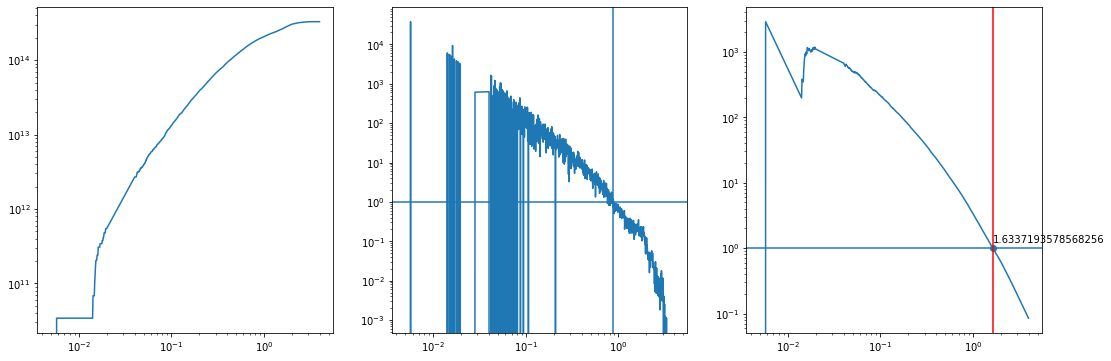

In [110]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True)
ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile))
# ax1.set_xlim(1e-2,2)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor,)
ax2.axhline(1)
ax2.axvline(r_rho_is_vir)
rhoR = np.cumsum(mass_profile)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
sleep(.01)
plt.close()

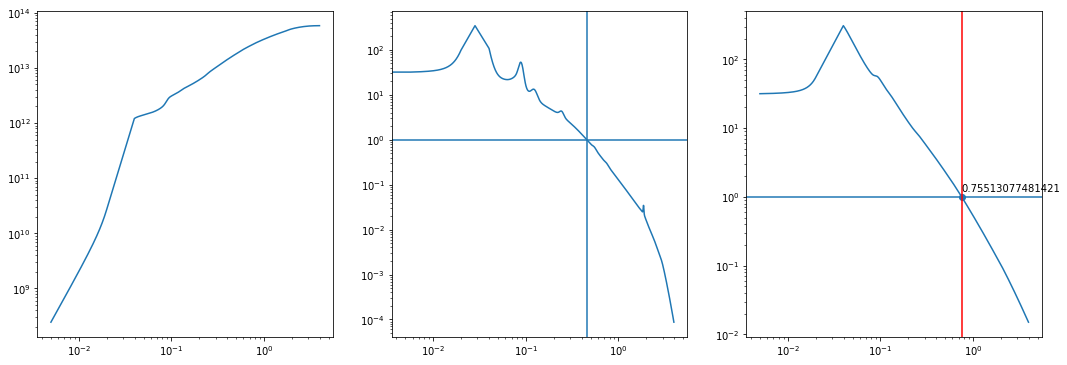

In [380]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True)
ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile_bar))
# ax1.set_xlim(1e-2,2)
rhor = mass_profile_bar/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen, fill_value='extrapolate')(1)
ax2.loglog(Rad_bin_cen, rhor,)
ax2.axhline(1)
ax2.axvline(r_rho_is_vir)
rhoR = np.cumsum(mass_profile_bar)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:], fill_value='extrapolate')(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
# sleep(.01)
# plt.close()

In [112]:
posd_dmo_r = np.linalg.norm(posd_dmo_sel-find_peak(rhod_dmo,[-loc_box*R,loc_box*R]), axis=1)

In [113]:
mass_profile_dmo = np.histogram(posd_dmo_r, Rad_bin_edge)[0]* snap_dmo.mass_table[1]*1e10

In [114]:
# mass_profile_dmo

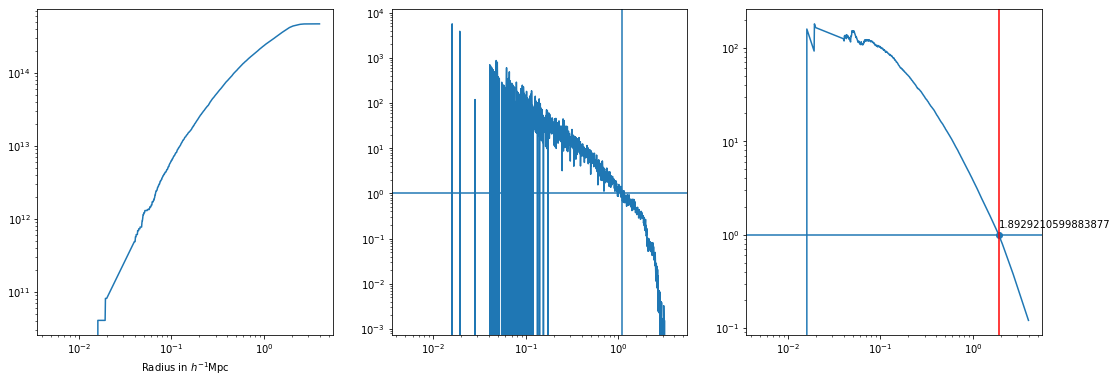

In [115]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True)
ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile_dmo))
# ax1.set_xlim(1e-2,2)
ax1.set_xlabel('Radius in $h^{-1}$Mpc')
rhor = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor,)
ax2.axhline(1)
ax2.axvline(r_rho_is_vir)
rhoR = np.cumsum(mass_profile_dmo)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
# sleep(.01)
plt.close()

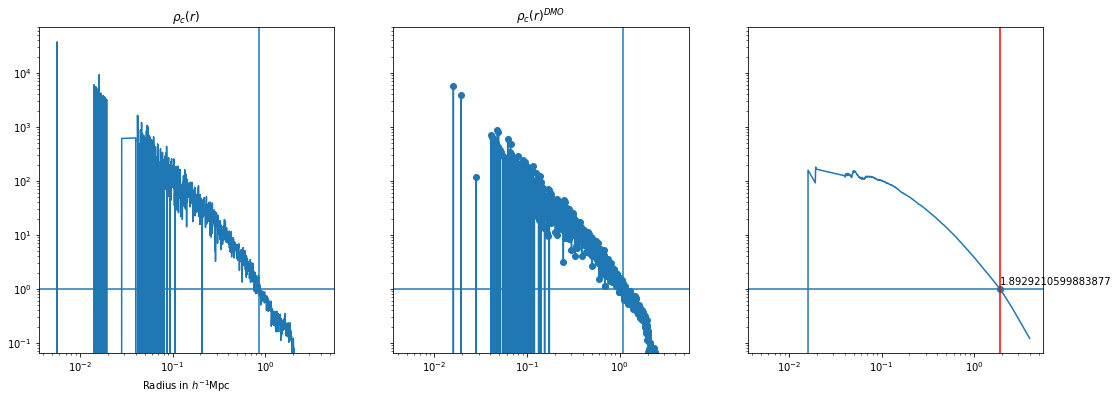

In [116]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True, sharey=True)
# ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile_dmo))
# ax1.set_xlim(1e-2,2)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax1.loglog(Rad_bin_cen, rhor,)
ax1.axhline(1)
ax1.axvline(r_rho_is_vir)
ax1.set_xlabel('Radius in $h^{-1}$Mpc')
ax1.set_title(r'$\rho_{c}(r)$')
rhor_dmo = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_dmo_is_vir = interp1d(rhor_dmo, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor_dmo, marker='o')
ax2.axhline(1)
ax2.axvline(r_rho_dmo_is_vir)
ax2.set_title(r'$\rho_{c}(r)^{DMO}$')
rhoR = np.cumsum(mass_profile_dmo)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
# sleep(.01)
plt.close()

(0.005, 5.534848479747248)

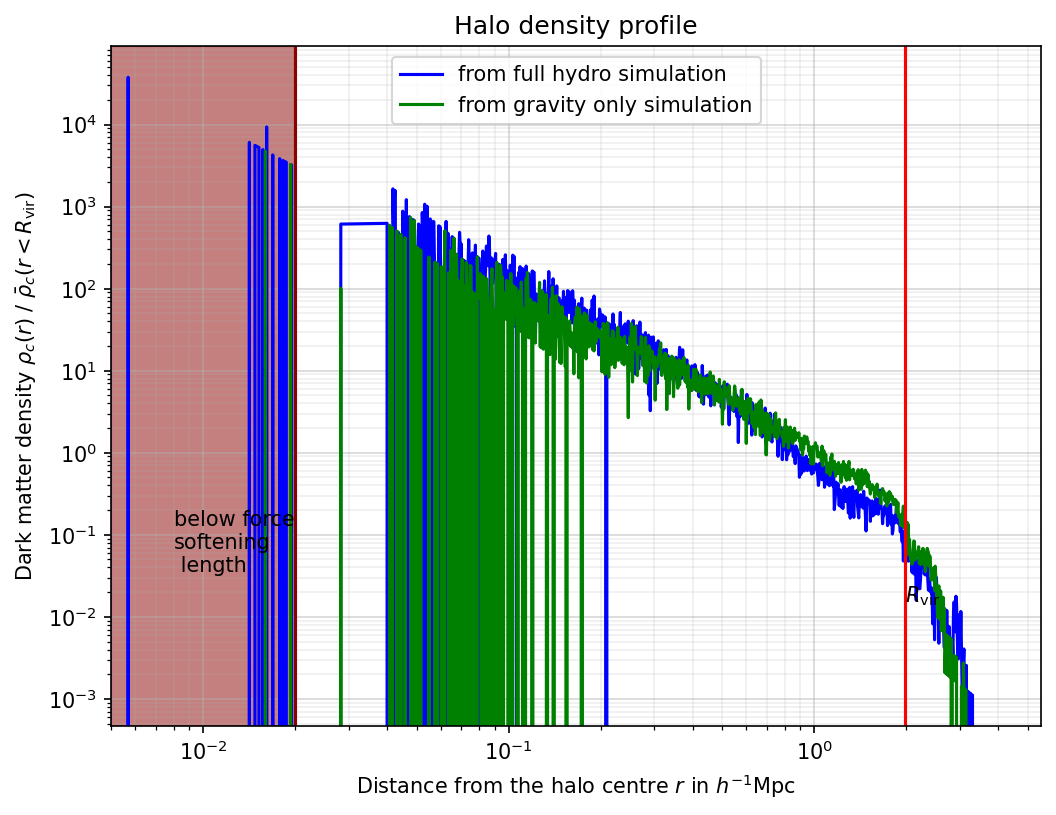

In [117]:
fig, ax1 = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=150)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens 
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax1.axvspan(0.005,0.02, alpha=0.5, color='darkred')#, label='resolution limit')
ax1.axvline(0.02, color='darkred')
ax1.loglog(Rad_bin_cen, rhor, label=r'from full hydro simulation', c='b')
# ax1.axhline(1)
# ax1.axvline(r_rho_is_vir)
ax1.set_xlabel('Distance from the halo centre $r$ in $h^{-1}$Mpc')
# ax1.set_title(r'$\rho_{c}(r)$')
rhor_dmo = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens *snap.mass_table[1]/snap_dmo.mass_table[1]
r_rho_dmo_is_vir = interp1d(rhor_dmo, Rad_bin_cen)(1)
ax1.loglog(Rad_bin_cen, rhor_dmo, label='from gravity only simulation', c='green')
# ax1.axhline(1, c='purple')
ax1.axvline(R, c='red')# label='Virial radius')
ax1.text(R,1.5e-2,r'$R_{\mathrm{vir}}$')
ax1.text(0.008, 3.5e-2, 'below force \nsoftening\n length')
# ax1.text(3e-2,1, 'Mean density within virial radius')
# ax2.axvline(r_rho_dmo_is_vir)
# ax2.set_title(r'$\rho_{c}(r)^{DMO}$')
ax1.set_ylabel(r'Dark matter density $\rho_{c}(r)$ / $\bar{\rho}_{c}(r<R_{\mathrm{vir}})$')
plt.legend()
# plt.close()
plt.grid(which='major', axis='both', alpha=0.5)
plt.grid(which='minor', axis='both', alpha=0.2)
ax1.set_title('Halo density profile')
ax1.set_xlim(left=0.005)
# fig.savefig('dens_profile.pdf')

In [118]:
vir_dens

14739052088109.37

In [388]:
mass_profile_bar = np.nan_to_num(mass_profile_bar)

In [389]:
f_bar = 1 - snap.mass_table[1]/snap_dmo.mass_table[1]
f_dm = 1 - f_bar

In [390]:
r, Mdr, Mbr, Mdr_dmo = Rad_bin_edge[1:], np.cumsum(mass_profile), np.cumsum(mass_profile_bar), np.cumsum(mass_profile_dmo)*f_dm
# r, Mdr, Mbr, Mdr_dmo

In [ ]:
Mbr = 

In [391]:
ri_M = interp1d(Mdr_dmo,r, fill_value='extrapolate')

In [392]:
# ri_M(Mdr_dmo)

In [393]:
rf = r

In [394]:
ri = ri_M(Mdr)

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


In [395]:
Mf = Mdr+Mbr

In [396]:
Mi = Mdr/f_dm

In [397]:
MiMf = ( f_dm* (Mbr/ Mdr + 1) )**-1
# MiMf

<ipython-input-397-301daa159431>:1: RuntimeWarning: divide by zero encountered in true_divide
  MiMf = ( f_dm* (Mbr/ Mdr + 1) )**-1


In [399]:
Mbr

array([2.44564322e+08, 2.67659148e+08, 2.92182592e+08, ...,
       5.81367603e+13, 5.81415819e+13, 5.81462095e+13])

Text(0.5, 0, '$M_i(r_i) ~/~ M_f(r_f)$')

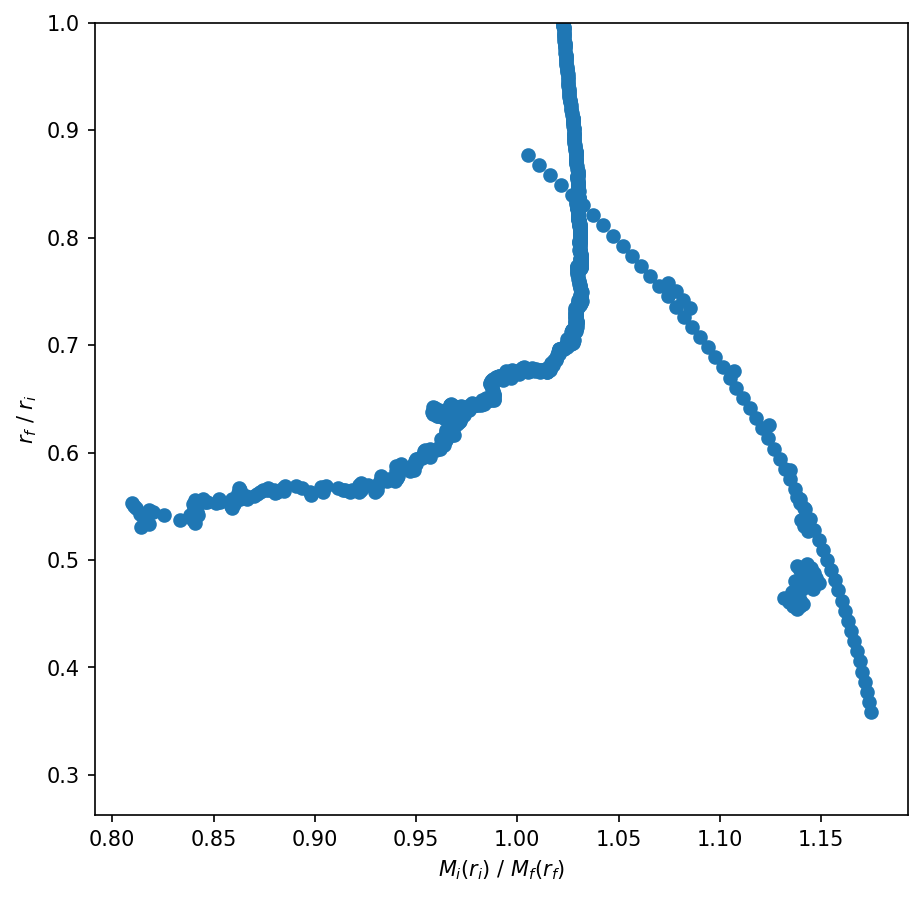

In [419]:
plt.figure(dpi=150,figsize=(7,7))
plt.plot(Mi/Mf,rf/ri,'o')
# plt.plot(Mi/Mf,rf)#,'o')
# plt.xlim(0,1)
plt.ylim(top=1)
plt.ylabel('$r_f ~/~ r_i$')
plt.xlabel('$M_i(r_i) ~/~ M_f(r_f)$')

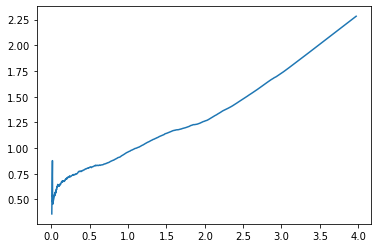

In [407]:
plt.plot(rf, rf/ri)

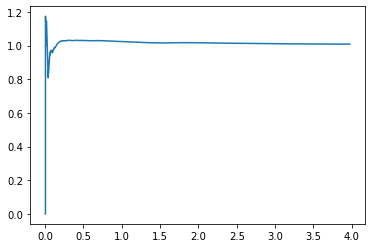

In [408]:
plt.plot(rf, Mi/Mf)

In [117]:
# posd_sel

In [118]:
# rhod.max()

In [87]:
rhob.shape

(256, 256, 256)

In [89]:
# np.save('rhob_sph256.npy', rhob)

In [120]:
exte = np.array([-2,3,-4,5,-6,7])

In [121]:
exte.reshape(3,2)

array([[-2,  3],
       [-4,  5],
       [-6,  7]])

In [122]:
find_peak(rhob_slice,[-2,2])

array([-0.171875, -0.203125])

In [123]:
np.unravel_index(rhob_slice.argmax(), rhob_slice.shape)

(234, 230)

In [88]:
rhob_slice[234,230]

0.19735149384081163

In [89]:
rhob_slice.max()

0.19735149384081163

In [171]:
deltad = assign_density(posd, L, scheme='CIC')#, overdensity=False)

In [172]:
# deltab = assign_density(posb, L, scheme='NGP')

In [173]:
deltad_slice = deltad[:,:,z_slc-2:z_slc+2].mean(axis=2)

In [174]:
# deltad_slice = deltad[:256]

In [175]:
# deltab_slice = deltab[100:150].mean(axis=0)

In [176]:
# deltad_slice

In [177]:
# vmin=5e-2,vmax=5e2, extent=[0,snap.box_size,0,snap.box_size]

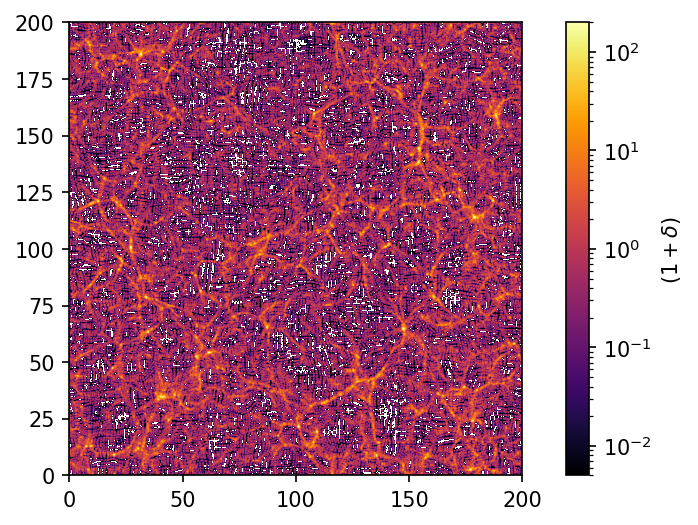

In [178]:
fig1, ax1 = plt.subplots(1,1, figsize=(7.5,4), dpi=150)
im1 = ax1.imshow(deltad_slice+1, norm=LogNorm(vmin=5e-3,vmax=2e2), cmap='inferno', extent=[0,snap.box_size,0,snap.box_size], origin='lower')
cb1 = fig1.colorbar(im1,ax=ax1)
cb1.set_label(r"$(1+\delta)$")

In [28]:
fname = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5"

In [29]:
unit_base = {'UnitLength_in_cm'         : 3.08568e+24,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = L #Mpc

bbox = [[0,bbox_lim],
        [0,bbox_lim],
        [0,bbox_lim]]
 
ds = yt.load(fname, unit_base=unit_base)#, bounding_box=bbox)#, cosmology_parameters={})
ds.index

yt : [INFO     ] 2021-06-04 23:48:42,121 Calculating time from 4.823e-01 to be 1.766e+17 seconds
yt : [INFO     ] 2021-06-04 23:48:42,166 Parameters: current_time              = 1.765662122310988e+17 s
yt : [INFO     ] 2021-06-04 23:48:42,167 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-06-04 23:48:42,168 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-06-04 23:48:42,169 Parameters: domain_right_edge         = [200. 200. 200.]
yt : [INFO     ] 2021-06-04 23:48:42,170 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-06-04 23:48:42,171 Parameters: current_redshift          = 1.0735799419483163
yt : [INFO     ] 2021-06-04 23:48:42,171 Parameters: omega_lambda              = 0.6936625
yt : [INFO     ] 2021-06-04 23:48:42,172 Parameters: omega_matter              = 0.3063375
yt : [INFO     ] 2021-06-04 23:48:42,173 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-06-04 23:48:42,173 Parameters: hubble_constant 

In [30]:
ad= ds.all_data()

In [31]:
ds.fields

In [34]:
ds.fields.PartType0.Masses

On-Disk Field (PartType0, Masses): (units: code_mass, particle field)

In [42]:
hsmlb = np.array(ad[("PartType0","SmoothingLength")])
massb = np.array(ad[("PartType0","Masses")])

In [37]:
ds.fields.PartType0.ParticleIDs[:]

TypeError: 'DerivedField' object is not subscriptable

In [40]:
np.array(hsml)

array([0.0067433 , 0.00701274, 0.00689296, ..., 0.03423185, 0.03491436,
       0.04555199])

In [105]:
px1 = yt.SlicePlot(ds, 'z', ('deposit', 'PartType1_density'))

yt : [INFO     ] 2021-05-26 19:51:31,137 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-26 19:51:31,138 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-26 19:51:31,139 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-26 19:51:31,140 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-26 19:51:31,141 Making a fixed resolution buffer of (('deposit', 'PartType1_density')) 800 by 800


/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]



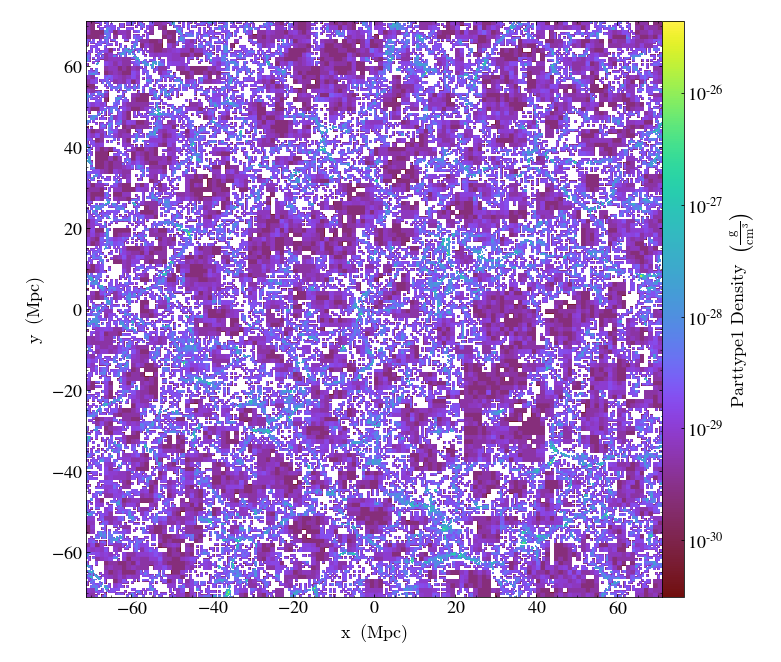

In [106]:
px1.show()

In [109]:
px2 = yt.SlicePlot(ds, 'z', ('gas', 'density'), origin='native' )

yt : [INFO     ] 2021-05-26 19:55:22,630 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-26 19:55:22,631 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-26 19:55:22,632 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-26 19:55:22,633 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-26 19:55:22,634 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_colle


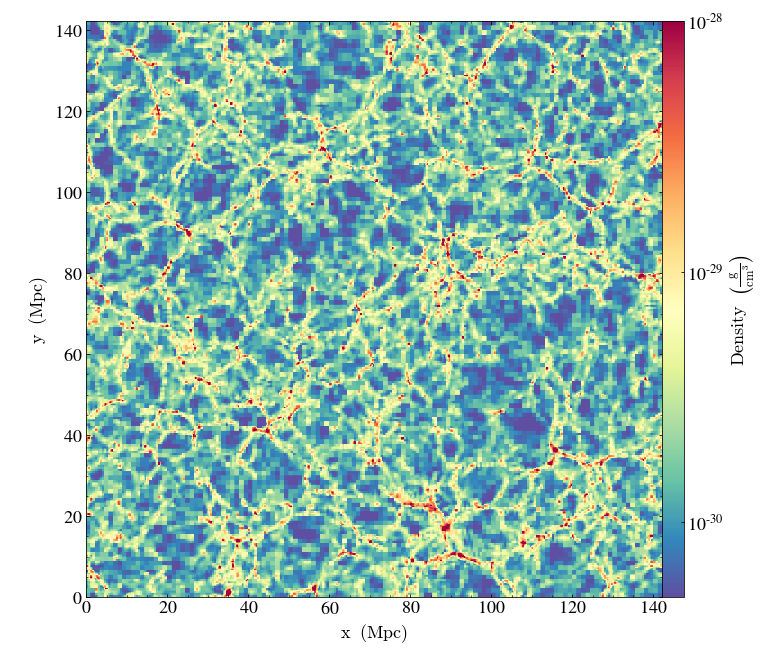

In [126]:
px2.set_zlim('all', 5e-31,1e-28)
px2.set_cmap('all', 'Spectral_r')

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]



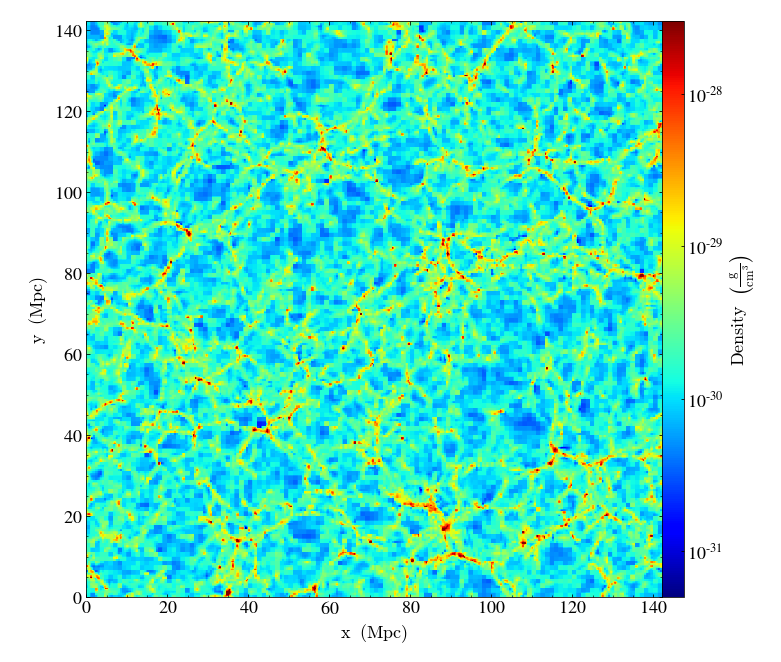

In [120]:
px2.show()

In [165]:
h

0.6781

In [166]:
a

0.526628

In [167]:
z

0.8988735881874872

In [168]:
fac = a/h

In [169]:
fac*200

155.32458339477952

In [170]:
px3 = yt.SlicePlot(ds, 'z', ('gas', 'density'), width=(3,3), origin='native', center=[ds.quan(X*fac, 'Mpc'), ds.quan(Y*fac, 'Mpc'), ds.quan(Z*fac, 'Mpc')])

NameError: name 'ds' is not defined

In [ ]:
px3.show()


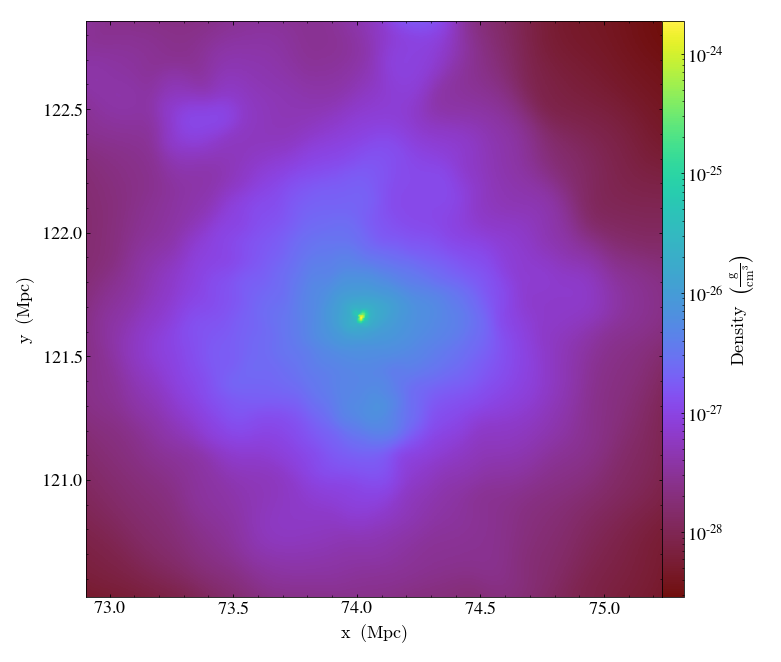

In [157]:
px3.show()


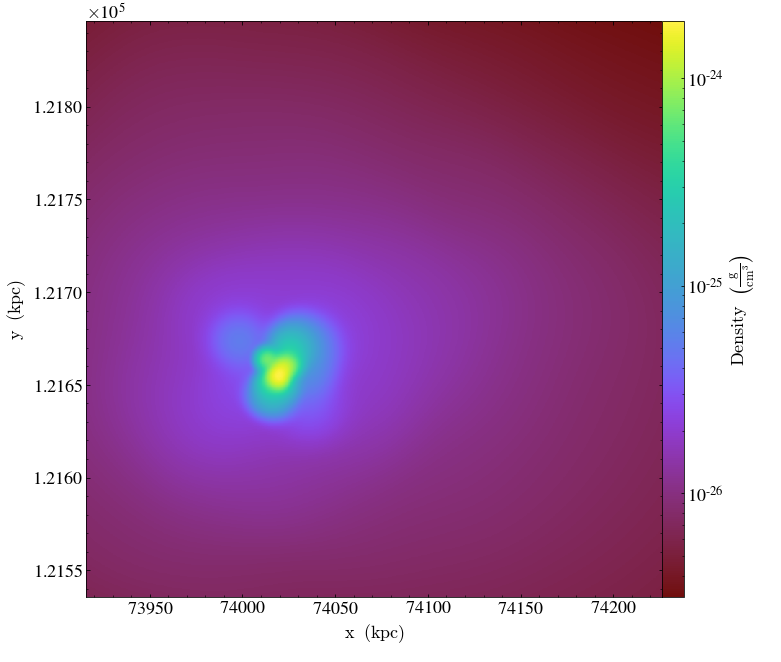

In [155]:
px3.show()

In [42]:
px4 = yt.SlicePlot(ds, 'z', ('deposit', 'PartType1_cic'), width=(5,5), origin='native', center=[ds.quan(X*fac, 'Mpc'), ds.quan(Y*fac, 'Mpc'), ds.quan(Z*fac, 'Mpc')])

yt : [INFO     ] 2021-05-04 10:59:27,526 xlim = 72.293183 75.849134
yt : [INFO     ] 2021-05-04 10:59:27,529 ylim = 119.912822 123.468773
yt : [INFO     ] 2021-05-04 10:59:27,531 xlim = 101.650971 106.650971
yt : [INFO     ] 2021-05-04 10:59:27,532 ylim = 168.608634 173.608634
yt : [INFO     ] 2021-05-04 10:59:27,535 Making a fixed resolution buffer of (('deposit', 'PartType1_cic')) 800 by 800


/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]



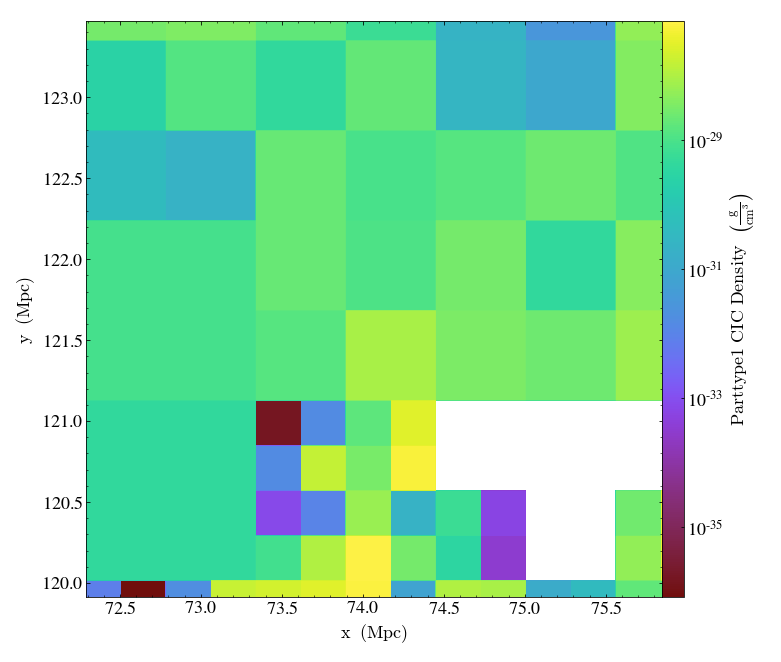

In [43]:
px4.show()

In [88]:
fname_dm = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5"

In [89]:
unit_base = {'UnitLength_in_cm'         : 3.08568e+24,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = L #Mpc

bbox = [[0,bbox_lim],
        [0,bbox_lim],
        [0,bbox_lim]]
 
ds_dm = yt.load(fname, unit_base=unit_base)#, bounding_box=bbox)#, cosmology_parameters={})
ds_dm.index

yt : [INFO     ] 2021-05-04 00:35:12,893 Calculating time from 5.266e-01 to be 1.994e+17 seconds
yt : [INFO     ] 2021-05-04 00:35:13,044 Parameters: current_time              = 1.9936556826647987e+17 s
yt : [INFO     ] 2021-05-04 00:35:13,046 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-04 00:35:13,047 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-04 00:35:13,048 Parameters: domain_right_edge         = [200. 200. 200.]
yt : [INFO     ] 2021-05-04 00:35:13,049 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-04 00:35:13,049 Parameters: current_redshift          = 0.8988727454476295
yt : [INFO     ] 2021-05-04 00:35:13,050 Parameters: omega_lambda              = 0.6936625
yt : [INFO     ] 2021-05-04 00:35:13,051 Parameters: omega_matter              = 0.3063375
yt : [INFO     ] 2021-05-04 00:35:13,051 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-04 00:35:13,052 Parameters: hubble_constant

In [90]:
ad_dm= ds.all_data()

In [91]:
ds_dm.fields

In [ ]:
px1 = yt.SlicePlot(ds_dm, 'z', ('gas', 'density'))

In [ ]:
px1.show()

In [47]:
px3 = yt.SlicePlot(ds_dm, 'z', ('gas', 'density'), width=(5000,5000), origin='native', center=[ds.quan(10.8, 'Mpc'), ds.quan(36.3, 'Mpc'), ds.quan(31.5, 'Mpc')])

yt : [INFO     ] 2021-04-14 01:01:18,654 xlim = 7.109418 14.490582
yt : [INFO     ] 2021-04-14 01:01:18,657 ylim = 32.609418 39.990582
yt : [INFO     ] 2021-04-14 01:01:18,658 xlim = 4815.919006 9815.919006
yt : [INFO     ] 2021-04-14 01:01:18,659 ylim = 22089.616661 27089.616661
yt : [INFO     ] 2021-04-14 01:01:18,661 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



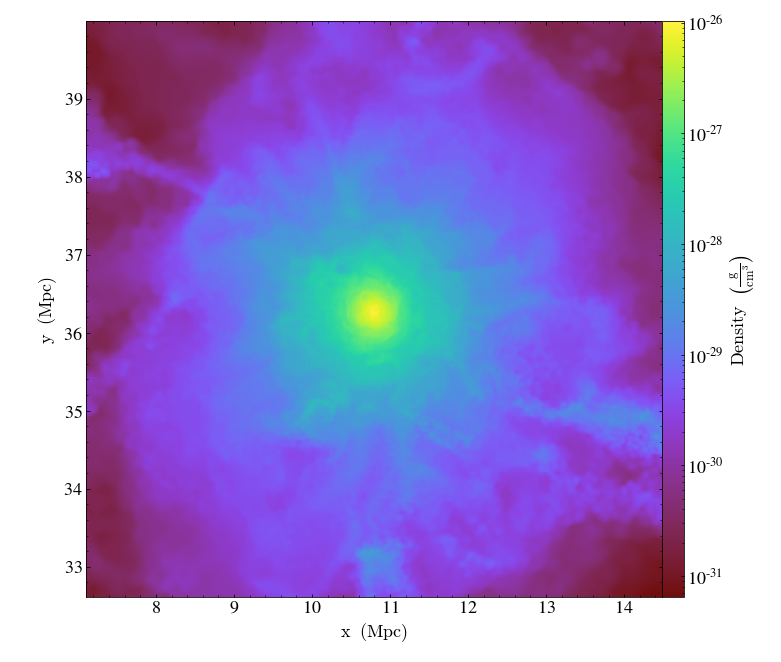

In [48]:
px3.show()